In [71]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt


In [72]:
len([f.split("_")[:3] for f in os.listdir("/home/kristaps/Projs/bulbulis/data/") if ".jp2" in f])


54720

In [73]:
parts = [f.split("_")[:3] for f in os.listdir("/home/kristaps/Projs/bulbulis/data/") if ".jp2" in f]


In [74]:
len(sorted(list(set([p[1][:8] for p in parts]))))

1380

In [75]:
dates = {}

for d in list(set([p[1][:8] for p in parts])):
    if d[:4] not in dates:
        dates[d[:4]] = {
            d[4:6]: 1
        }
    elif d[4:6] not in dates[d[:4]]:
        dates[d[:4]][d[4:6]] = 1
    else:
        dates[d[:4]][d[4:6]] += 1
        

In [76]:
years = sorted(list(dates.keys()))
months = [str(i).zfill(2) for i in range(1, 13)]
for y in years:
    print(f"{y} => {" | ".join([f"{m}:{dates[y].get(m, 0):2}" for m in months])}")
    

2015 => 01: 0 | 02: 0 | 03: 0 | 04: 0 | 05: 0 | 06: 0 | 07:10 | 08:22 | 09:14 | 10: 6 | 11: 9 | 12:13
2016 => 01:19 | 02:13 | 03:20 | 04:10 | 05: 9 | 06: 8 | 07:13 | 08:16 | 09:15 | 10: 5 | 11: 2 | 12: 2
2017 => 01: 5 | 02: 4 | 03:11 | 04:12 | 05:15 | 06: 8 | 07:12 | 08:13 | 09: 8 | 10: 6 | 11: 2 | 12: 0
2018 => 01: 4 | 02: 2 | 03: 8 | 04:14 | 05:20 | 06:12 | 07:14 | 08: 9 | 09: 8 | 10:15 | 11: 6 | 12: 2
2019 => 01: 3 | 02: 7 | 03: 5 | 04:22 | 05: 9 | 06:13 | 07:12 | 08:10 | 09: 7 | 10: 5 | 11: 1 | 12: 6
2020 => 01: 5 | 02: 7 | 03:10 | 04:16 | 05:13 | 06:14 | 07: 8 | 08:14 | 09:11 | 10: 3 | 11: 6 | 12: 7
2021 => 01:31 | 02:26 | 03:29 | 04:11 | 05:15 | 06:22 | 07:19 | 08:14 | 09:10 | 10:22 | 11:11 | 12:12
2022 => 01:17 | 02: 4 | 03:22 | 04:26 | 05:13 | 06:17 | 07:21 | 08:13 | 09: 5 | 10:23 | 11: 0 | 12: 3
2023 => 01:25 | 02: 8 | 03: 6 | 04:26 | 05:24 | 06:19 | 07:31 | 08:29 | 09:30 | 10: 2 | 11: 4 | 12: 2
2024 => 01: 5 | 02: 1 | 03: 9 | 04:14 | 05:24 | 06:21 | 07:12 | 08: 9 | 09:16 | 10

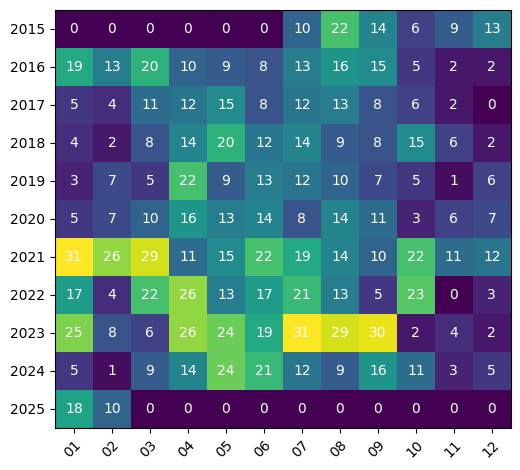

In [77]:
coverage = np.array([[dates[y].get(m, 0) for m in months] for y in years])

fig, ax = plt.subplots()
im = ax.imshow(coverage)

# Show all ticks and label them with the respective list entries
ax.set_xticks(range(len(months)), labels=months, rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(years)), labels=years)

# Loop over data dimensions and create text annotations.
for i in range(len(years)):
    for j in range(len(months)):
        text = ax.text(j, i, coverage[i, j], ha="center", va="center", color="w")

fig.tight_layout()
plt.show()